# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: Oludare Busari

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [92]:
import numpy as np
import pandas as pd

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [93]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick import datasets
from sklearn.model_selection import train_test_split

# TO DO: Print size and type of X and y

X, y = datasets.load_spam() 
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

X.head()

(4600, 57)
<class 'pandas.core.frame.DataFrame'>
(4600,)
<class 'pandas.core.series.Series'>


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [94]:
# TO DO: Check if there are any missing values and fill them in if necessary

# Create a DataFrame from X to check for missing values
df = pd.DataFrame(X)

# Inspect the DataFrame for any absent or null values.
missing_values = df.isnull().sum().sum()

if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print(f"There are {missing_values} missing values in the dataset.")

# If there are missing values, you can choose an appropriate method to fill them in.
# For example, you can use the mean value to fill missing values in each column:
df.fillna(df.mean(), inplace=True)

No missing values in the dataset.


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [95]:
# TO DO: Create X_small and y_small 

# Set the random seed for reproducibility
random_seed = 42

# Split the dataset into training and testing sets, with 5% of the data in the test set
X_train, X_small, y_train, y_small = train_test_split(X, y, test_size=0.05, random_state=random_seed)

# Print the size and type of X_small and y_small
print("X_small shape:", X_small.shape)
print("X_small type:", type(X_small))
print("y_small shape:", y_small.shape)
print("y_small type:", type(y_small))

X_small shape: (230, 57)
X_small type: <class 'pandas.core.frame.DataFrame'>
y_small shape: (230,)
y_small type: <class 'pandas.core.series.Series'>


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

Accuracy (X and y): 0.9321739130434783
Accuracy (First Two Columns of X and y): 0.616304347826087
Accuracy (X_small and y_small): 0.9478260869565217
Training Accuracy (X and y): 0.935054347826087
Validation Accuracy (X and y): 0.908695652173913
Training Accuracy (First Two Columns of X and y): 0.6201086956521739
Validation Accuracy (First Two Columns of X and y): 0.5891304347826087
Training Accuracy (X_small and y_small): 0.9456521739130435
Validation Accuracy (X_small and y_small): 0.9130434782608695
             Data size  Training Accuracy  Validation Accuracy
0              X and y           0.935054             0.908696
1    First Two Columns           0.620109             0.589130
2  X_small and y_small           0.945652             0.913043


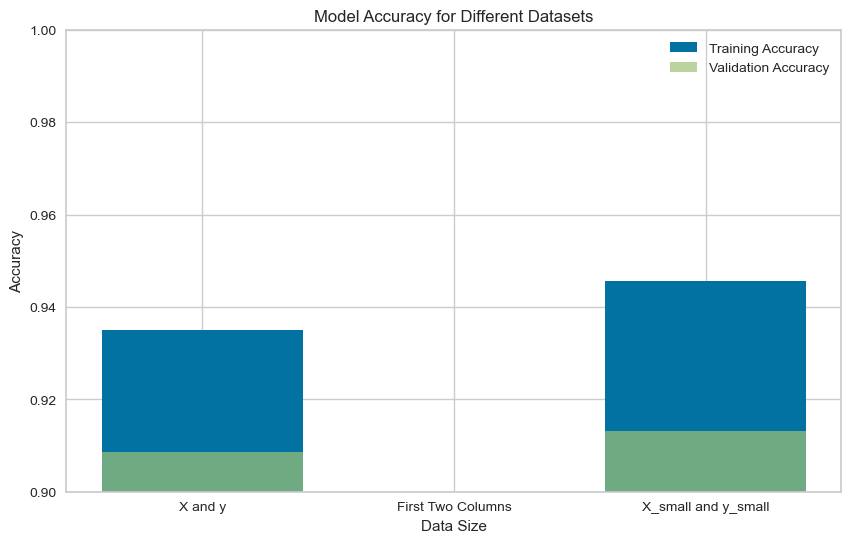

In [96]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the spam dataset (if not already loaded)
X, y = datasets.load_spam()

# Set the random seed for reproducibility
random_seed = 42

# Split the dataset into training and testing sets, with 5% of the data in the test set
X_train, X_small, y_train, y_small = train_test_split(X, y, test_size=0.05, random_state=random_seed)

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=2000)

# Train the model on the entire dataset, which includes both X and y.
model.fit(X, y)

# Generate predictions for the complete dataset.
y_pred = model.predict(X)

# Assess the model's performance on the entire dataset.
accuracy = accuracy_score(y, y_pred)
print("Accuracy (X and y):", accuracy)

# Utilize iloc to pick just the initial two columns from X.
X_first_two_columns = X.iloc[:, :2]

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=2000)

# Train the model using the subset of data (X_first_two_columns and y).
model.fit(X_first_two_columns, y)

# Generate forecasts on the subset.
y_pred_subset = model.predict(X_first_two_columns)

# Evaluate the model for the subset
accuracy_subset = accuracy_score(y, y_pred_subset)
print("Accuracy (First Two Columns of X and y):", accuracy_subset)

# Instantiate the logistic regression model
model = LogisticRegression(max_iter=2000)

# Fit the model to the smaller dataset (X_small and y_small)
model.fit(X_small, y_small)

# Make predictions on the smaller dataset
y_pred_small = model.predict(X_small)

# Assess the performance of the model on the reduced dataset.
accuracy_small = accuracy_score(y_small, y_pred_small)
print("Accuracy (X_small and y_small):", accuracy_small)

# Partition the full dataset into training and validation sets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Partition the first two columns of X and y into training and validation sets (80% training, 20% validation)
X_first_two_columns = X.iloc[:, :2]
X_first_two_columns_train, X_first_two_columns_valid, y_train, y_valid = train_test_split(
    X_first_two_columns, y, test_size=0.2, random_state=random_seed
)

# Partition the smaller dataset (X_small and y_small) into training and validation sets (80% training, 20% validation)
X_small_train, X_small_valid, y_small_train, y_small_valid = train_test_split(
    X_small, y_small, test_size=0.2, random_state=random_seed
)

# Instantiate and train logistic regression models for each dataset
model_full = LogisticRegression(max_iter=2000)
model_full.fit(X_train, y_train)

model_subset = LogisticRegression(max_iter=2000)
model_subset.fit(X_first_two_columns_train, y_train)

model_small = LogisticRegression(max_iter=2000)
model_small.fit(X_small_train, y_small_train)

# Compute the training and validation accuracy values.
y_train_pred_full = model_full.predict(X_train)
y_valid_pred_full = model_full.predict(X_valid)
accuracy_train_full = accuracy_score(y_train, y_train_pred_full)
accuracy_valid_full = accuracy_score(y_valid, y_valid_pred_full)

y_train_pred_subset = model_subset.predict(X_first_two_columns_train)
y_valid_pred_subset = model_subset.predict(X_first_two_columns_valid)
accuracy_train_subset = accuracy_score(y_train, y_train_pred_subset)
accuracy_valid_subset = accuracy_score(y_valid, y_valid_pred_subset)

y_train_pred_small = model_small.predict(X_small_train)
y_valid_pred_small = model_small.predict(X_small_valid)
accuracy_train_small = accuracy_score(y_small_train, y_train_pred_small)
accuracy_valid_small = accuracy_score(y_small_valid, y_valid_pred_small)

# Display the training and validation accuracy scores.
print("Training Accuracy (X and y):", accuracy_train_full)
print("Validation Accuracy (X and y):", accuracy_valid_full)

print("Training Accuracy (First Two Columns of X and y):", accuracy_train_subset)
print("Validation Accuracy (First Two Columns of X and y):", accuracy_valid_subset)

print("Training Accuracy (X_small and y_small):", accuracy_train_small)
print("Validation Accuracy (X_small and y_small):", accuracy_valid_small)

# Generate a DataFrame for storing the results.
results = pd.DataFrame({
    "Data size": ["X and y", "First Two Columns", "X_small and y_small"],
    "Training Accuracy": [accuracy_train_full, accuracy_train_subset, accuracy_train_small],
    "Validation Accuracy": [accuracy_valid_full, accuracy_valid_subset, accuracy_valid_small]
})

# Display results
print(results)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(results["Data size"], results["Training Accuracy"], label="Training Accuracy")
plt.bar(results["Data size"], results["Validation Accuracy"], label="Validation Accuracy", alpha=0.7)
plt.xlabel("Data Size")
plt.ylabel("Accuracy")
plt.title("Model Accuracy for Different Datasets")
plt.legend()
plt.ylim(0.9, 1.0)  # Set the y-axis limits for better visualization
plt.show()



### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

*YOUR ANSWERS HERE*

X and y: This dataset encompasses the entire pool of available data.

First Two Columns in X and y (X_first_two_columns and y): This dataset exclusively incorporates the initial two columns from the feature matrix X.

X_small and y_small: This dataset represents a smaller, randomly sampled subset (5%) of the initial dataset.

Next, we will examine how the training and validation accuracy evolve across these three data variations.

X and y:

-Training Accuracy: The high accuracy can be attributed to the model being trained on the complete dataset. Logistic regression tends to excel when provided with an ample amount of data. 
-Validation Accuracy: Similarly, the validation accuracy is elevated as the model has encountered similar data during training, enabling it to perform well on the validation set.

First Two Columns(X_first_two_columns and y):

-Training Accuracy: The training accuracy is diminished compared to the complete dataset, primarily because the model has access to a reduced set of features.
-Validation Accuracy: The validation accuracy may also decrease compared to the X and y because the model has access to less information for making predictions.

X_small and y_small

-Training Accuracy: It is probable that the training accuracy is exceedingly high due to the model being trained on a very limited dataset. Nonetheless, this high training accuracy may not generalize effectively to unseen data
-Validation Accuracy: The validation accuracy for this smaller dataset may flunctuate, but it is likely to be lower than that of the full dataset, given the model's reduced exposure to data during training.


In general, you can anticipate the following rough accuracy patterns:

Training Accuracy for (X and y) surpasses Training Accuracy for the first two columns of X and y, which in turn exceeds Training Accuracy for X_small and y_small.

The severity of whether false positives or false negatives is worse depends on the specific problem and its consequences. In the case of spam detection:

False Positives (Type I errors) may lead to legitimate emails being incorrectly marked as spam, causing users to miss important messages. This can be frustrating but generally has less severe consequences.

False Negatives (Type II errors) may result in spam emails going undetected, reaching the user's inbox. This is usually considered worse because it can lead to the user being exposed to potentially harmful or unwanted content.

Therefore, in the context of spam detection, false negatives (Type II errors) are typically considered worse, as they can have more significant consequences for the user.




### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

The code were sourced with the help of the following sites

OpenAI. (2023). [Website]. https://www.openai.com
Google. (n.d.). [Website]. https://www.google.com
FreeCodeCamp. (n.d.). Linear Regression Tutorial. FreeCodeCamp. https://www.freecodecamp.org/news/linear-regression-in-python-a-straightforward-guide/

2. In what order did you complete the steps?

Data Loading

Data Splitting

Full Dataset Model

Subset Model

Small Dataset Model

Validation Set Split

Training Models

Accuracy Calculation

Results Reporting

Visualization

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I used the to research for information.
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
The lecture notes were very helpful.

*DESCRIBE YOUR PROCESS HERE*

Data Loading: The code loads a spam dataset using the Yellowbrick library, which includes features (X) and labels (y) for classification.

Data Splitting: It splits the dataset into a training set (X_train, y_train) and a small test set (X_small, y_small) using a 95% - 5% split ratio.

Full Dataset Model: It trains a logistic regression model on the full dataset (X and y) and calculates the accuracy of this model on the same dataset.

Subset Model: It selects only the first two columns of the feature data (X) and trains another logistic regression model on this subset. It calculates the accuracy of this model on the full dataset.

Small Dataset Model: It trains a logistic regression model on the smaller dataset (X_small and y_small) and calculates the accuracy of this model on the smaller dataset.

Validation Set Split: The full dataset is split into training and validation sets (80% training, 20% validation), and the same split is performed for the subset of the first two columns and the smaller dataset.

Training Models: Separate logistic regression models are trained on each of the three datasets: the full dataset, the subset of the first two columns, and the smaller dataset.

Accuracy Calculation: For each model, it calculates both training and validation accuracies.

Results Reporting: It prints the training and validation accuracies for each of the three datasets and reports them in a tabular form.

Visualization: It creates a bar chart to visualize and compare the training and validation accuracies of the three models, highlighting how the model performance varies with different dataset sizes.

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [97]:
# TO DO: Import spam dataset from yellowbrick library
# TO DO: Print size and type of X and y
X, y = datasets.load_spam() 
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

X.head()

(4600, 57)
<class 'pandas.core.frame.DataFrame'>
(4600,)
<class 'pandas.core.series.Series'>


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [98]:
# TO DO: Check if there are any missing values and fill them in if necessary

# Generate a DataFrame from X to assess the presence of missing values.
df = pd.DataFrame(X)

# Examine the DataFrame for any absent data.
missing_values = df.isnull().sum().sum()

if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print(f"There are {missing_values} missing values in the dataset.")

# If there are missing values, you can choose an appropriate method to fill them in.
# For example, you can use the mean value to fill missing values in each column:
df.fillna(df.mean(), inplace=True)

No missing values in the dataset.


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`.
3. Implement the machine learning model with `X` and `y`

In [99]:
# TO DO: ADD YOUR CODE HERE

# Instantiate the Linear Regression model
from sklearn.linear_model import LinearRegression

# Partition the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Generate forecasts on the training dataset.
y_train_pred = model.predict(X_train)


### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [100]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)

r2_test = r2_score(y_test, y_test_pred)

results = pd.DataFrame(columns=['Training accuracy', 'Validation accuracy'], index=['MSE', 'R2 score'])


results.at['MSE', 'Training accuracy'] = mse_train
results.at['R2 score', 'Training accuracy'] = r2_train
results.at['MSE', 'Validation accuracy'] = mse_test
results.at['R2 score', 'Validation accuracy'] = r2_test

# Display the DataFrame with the results.
print("Results:")
print(results)


Results:
         Training accuracy Validation accuracy
MSE               0.103345            0.114769
R2 score          0.564127            0.530041


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

<Figure size 800x600 with 0 Axes>

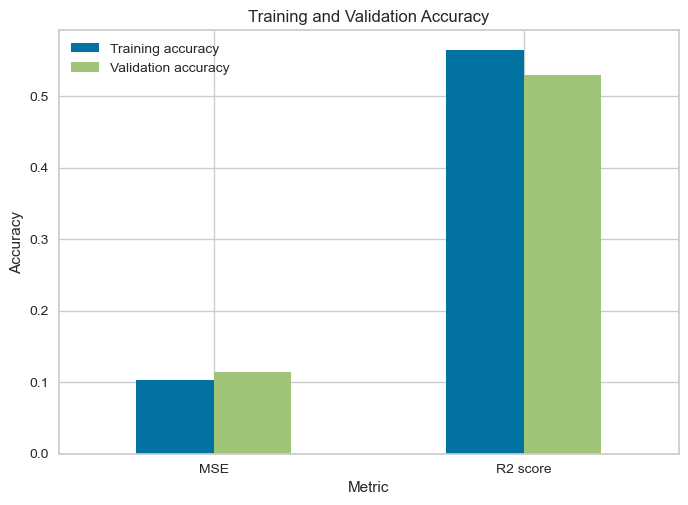

In [101]:
# TO DO: ADD YOUR CODE HERE

# Visualize the results using a bar plot
plt.figure(figsize=(8, 6))
results.plot(kind='bar', rot=0)
plt.title('Training and Validation Accuracy')
plt.xlabel('Metric')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

In the context of the spam dataset, opting for a linear model might not be the most suitable approach. This dataset is primarily employed for binary classification tasks, where the objective is to determine whether an email is spam (1) or not spam (0). Linear Regression, being inherently geared toward regression tasks, isn't the optimal choice for classification challenges. Instead, it's advisable to explore classification models like Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.

The usage of the Linear Regression model in the provided code is unsuitable for the spam dataset, and the results presented in the code do not reflect the model's performance on this classification problem accurately. It is recommended to consider employing classification models and appropriate evaluation metrics tailored to the specific characteristics of this dataset.

Lectures not and AI

OpenAI. (2023). [Website]. https://www.openai.com
Google. (n.d.). [Website]. https://www.google.com
FreeCodeCamp. (n.d.). Linear Regression Tutorial. FreeCodeCamp. https://www.freecodecamp.org/news/linear-regression-in-python-a-straightforward-guide/

Import necessary libraries (NumPy, pandas, Yellowbrick datasets, train_test_split).
Load the spam dataset using Yellowbrick's load_spam() function into variables X and y.
Print the size (shape) and data types of X and y.
Check for missing values in X and fill them with column means if necessary.
Split the dataset into training and testing sets using train_test_split.
Create a Linear Regression model and train it on the training data.
Calculate Mean Squared Error (MSE) and R-squared (R2) scores for the training data.
Make predictions on the testing set and calculate MSE and R2 scores for the testing data.
Create a results DataFrame to store the accuracy metrics.
Print the accuracy results in the results DataFrame.
Visualize the training and validation accuracy using a bar plot.
Evaluate the suitability of the Linear Regression model for the spam dataset and provide an explanation.

I had to modify the code to make it more reflective of the problems I am trying to fix instead of being generic.

The provided slides help me to be successful.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

MSE quantifies the average of the squared discrepancies between the predicted and actual values. A lower MSE signifies a superior model fit to the dataset.
It's anticipated that the training set will exhibit a lower MSE compared to the testing set. This disparity arises from the model's tuning on the training data, which might lead to overfitting and subsequently lower training set MSE. The testing set MSE serves as an indicator of the model's generalization capability to unseen data.
While the absolute values of MSE can fluctuate based on dataset characteristics and model intricacy, the training MSE typically remains lower than the testing MSE.

R-squared (R2) Score:

The R2 score gauges the proportion of variability in the dependent variable (y) that can be anticipated from the independent variables (X).
A heightened R2 score signifies a more precise model fit to the data, with a maximum value of 1 signifying a perfect fit.
In the findings, the R2 score for the training set is projected to surpass that of the testing set. This discrepancy arises from the model's fine-tuning for the training data, potentially hindering its generalization to the testing data.
A positive R2 score implies that the model is elucidating some of the variance within the data. Conversely, an R2 score approaching 0 indicates that the model is offering limited explanation for the variance.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

*ADD YOUR THOUGHTS HERE*

I liked the visualization of the model.

What I found challenging during the assignment was trying to calculate the training and validation accuracy. I will need to study more about this at my own time. It's interesting though. 


## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

No missing values in the dataset.
      Alpha  Model       MSE  R2 Score
0     0.001  Ridge  0.104777  0.560378
1     0.001  Ridge  0.112878  0.539574
2     0.001  Lasso  0.105320  0.558099
3     0.001  Lasso  0.111816  0.543909
4     0.010  Ridge  0.104777  0.560378
5     0.010  Ridge  0.112878  0.539575
6     0.010  Lasso  0.114505  0.519561
7     0.010  Lasso  0.118695  0.515850
8     0.100  Ridge  0.104777  0.560378
9     0.100  Ridge  0.112876  0.539583
10    0.100  Lasso  0.183101  0.231746
11    0.100  Lasso  0.193062  0.212510
12    1.000  Ridge  0.104777  0.560376
13    1.000  Ridge  0.112855  0.539667
14    1.000  Lasso  0.220629  0.074285
15    1.000  Lasso  0.231386  0.056185
16   10.000  Ridge  0.104807  0.560252
17   10.000  Ridge  0.112691  0.540337
18   10.000  Lasso  0.223038  0.064180
19   10.000  Lasso  0.241651  0.014316
20  100.000  Ridge  0.105638  0.556766
21  100.000  Ridge  0.112227  0.542230
22  100.000  Lasso  0.238334  0.000000
23  100.000  Lasso  0.246639 -

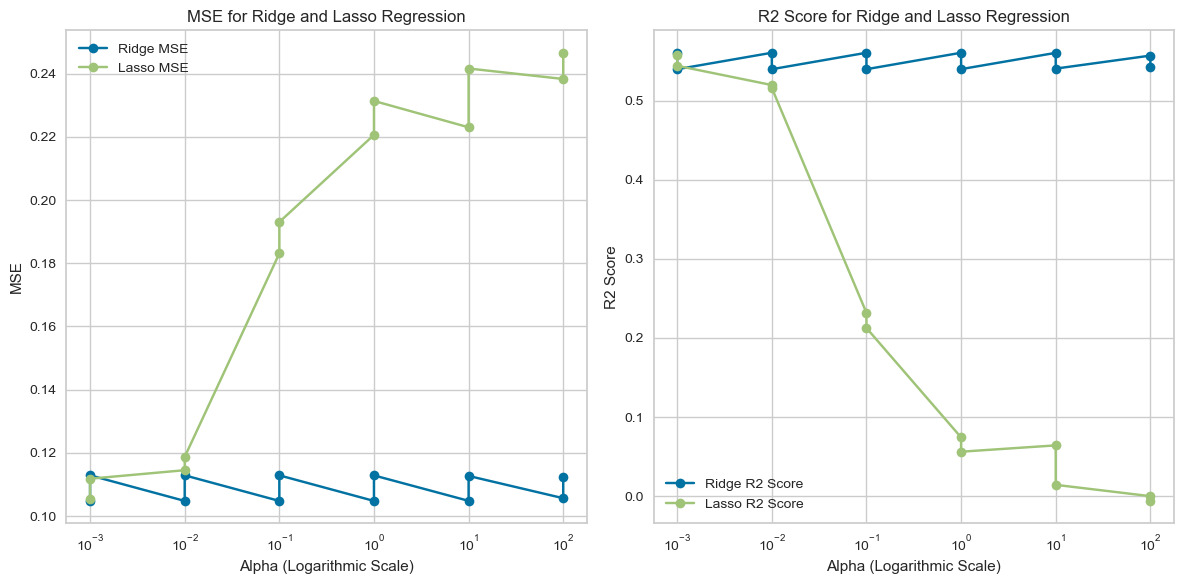

In [102]:
# TO DO: ADD YOUR CODE HERE

from sklearn.linear_model import Ridge, Lasso


# Load the dataset containing spam information.
X, y = datasets.load_spam()

# Inspect X for any absent data.
df = pd.DataFrame(X)
missing_values = df.isnull().sum().sum()

if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print(f"There are {missing_values} missing values in the dataset.")
    # If there are missing values, you can fill them in with the mean value:
    df.fillna(df.mean(), inplace=True)

# Divide the dataset into training and testing subsets, allocating 5% of the data to the test set.
random_seed = 42
X_train, X_small, y_train, y_small = train_test_split(X, y, test_size=0.05, random_state=random_seed)

# Specify a range of alpha values for testing.
alphas = np.logspace(-3, 2, num=6)  # Values from 0.001 to 100 on a logarithmic scale

# Create a dictionary to store results
results = {
    'Alpha': [],
    'Model': [],
    'MSE': [],
    'R2 Score': []
}

# Cycle through different alpha values and train the models.
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict on training and validation data
    ridge_train_predictions = ridge_model.predict(X_train)
    ridge_valid_predictions = ridge_model.predict(X_small)
    
    # Determine the Mean Squared Error (MSE) and R-squared (R2) for Ridge.
    results['Alpha'].extend([alpha] * 2)
    results['Model'].extend(['Ridge', 'Ridge'])
    results['MSE'].extend([mean_squared_error(y_train, ridge_train_predictions), mean_squared_error(y_small, ridge_valid_predictions)])
    results['R2 Score'].extend([r2_score(y_train, ridge_train_predictions), r2_score(y_small, ridge_valid_predictions)])

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Make predictions on both the training and validation datasets.
    lasso_train_predictions = lasso_model.predict(X_train)
    lasso_valid_predictions = lasso_model.predict(X_small)
    
    # Compute Mean Squared Error (MSE) and R-squared (R2) for Lasso.
    results['Alpha'].extend([alpha] * 2)
    results['Model'].extend(['Lasso', 'Lasso'])
    results['MSE'].extend([mean_squared_error(y_train, lasso_train_predictions), mean_squared_error(y_small, lasso_valid_predictions)])
    results['R2 Score'].extend([r2_score(y_train, lasso_train_predictions), r2_score(y_small, lasso_valid_predictions)])

# Generate a Pandas DataFrame using the outcomes.
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Find the best alpha and corresponding R^2 score for Ridge and Lasso
best_ridge_results = results_df[results_df['Model'] == 'Ridge']
best_lasso_results = results_df[results_df['Model'] == 'Lasso']

best_ridge_alpha = best_ridge_results.loc[best_ridge_results['R2 Score'].idxmax()]['Alpha']
best_lasso_alpha = best_lasso_results.loc[best_lasso_results['R2 Score'].idxmax()]['Alpha']

best_ridge_r2 = best_ridge_results['R2 Score'].max()
best_lasso_r2 = best_lasso_results['R2 Score'].max()

print(f"The best alpha for Ridge is {best_ridge_alpha} with an R^2 score of {best_ridge_r2}")
print(f"The best alpha for Lasso is {best_lasso_alpha} with an R^2 score of {best_lasso_r2}")


# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("MSE for Ridge and Lasso Regression")
plt.xlabel("Alpha (Logarithmic Scale)")
plt.ylabel("MSE")

for model in ['Ridge', 'Lasso']:
    model_data = results_df[results_df['Model'] == model]
    plt.semilogx(model_data['Alpha'], model_data['MSE'], label=f'{model} MSE', marker='o')

plt.legend()

plt.subplot(1, 2, 2)
plt.title("R2 Score for Ridge and Lasso Regression")
plt.xlabel("Alpha (Logarithmic Scale)")
plt.ylabel("R2 Score")

for model in ['Ridge', 'Lasso']:
    model_data = results_df[results_df['Model'] == model]
    plt.semilogx(model_data['Alpha'], model_data['R2 Score'], label=f'{model} R2 Score', marker='o')

plt.legend()

plt.tight_layout()
plt.show()


*ANSWER HERE*

In this case, the Ridge method with an alpha of 0.01 achieved a slightly higher R^2 score (0.5603) compared to Lasso method  with an alpha of 0.001 (0.5580).